In [1]:
import sympy

import sympy_utils
from sympy_utils import short_latex, ShortLatexPrinter, matsym, vec, dynvec, SympyDumpable

import model
import algorithms

sympy.init_session(latex_printer=short_latex)

IPython console for SymPy 1.3 (Python 3.7.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



In [2]:
# shorter sine/cosine
s, c = sin, cos

In [3]:
R, l = model.R, model.l
eta = model.eta

# Full models

With two different selections of control inputs.

In [4]:
exec(model.model_full_q__exec)

model_full_1 = model.define_full_1()
model_full_2 = model.define_full_2()

assert model_full_1.nonholonomic_constrains_satisfied(), 'Nonholonomic constrains not satisfied!'
assert model_full_2.nonholonomic_constrains_satisfied(), 'Nonholonomic constrains not satisfied!'

# both have the same nonholonomic constrains
model_full_1.show_pfaff()

⎡-cos(θ₀(t))  -sin(θ₀(t))   0    0   R⋅cos(φ₁(t))  -R⋅sin(φ₁(t))⋅cos(θ₁(t))  0
⎢                                                                             
⎢sin(θ₀(t))   -cos(θ₀(t))   0    -R       0             -R⋅sin(θ₁(t))        0
⎢                                                                             
⎢-cos(θ₀(t))  -sin(θ₀(t))  -2⋅l  0        0                   0              0
⎢                                                                             
⎣sin(θ₀(t))   -cos(θ₀(t))   0    0        0                   0              -

        0                   0            ⎤            
                                         ⎥            
        0                   0            ⎥            
                                         ⎥⋅\dot{q} = 0
   R⋅cos(φ₂(t))  -R⋅sin(φ₂(t))⋅cos(θ₂(t))⎥            
                                         ⎥            
R       0             -R⋅sin(θ₂(t))      ⎦            

## Direct control over deviations and one spinning

In [5]:
m = model_full_1 

# m.show_as_matrices()
m.show_as_equations().collect(eta).subs({R/(2*l): Symbol('R^*')})

⎡d        ⎤                                                                   
⎢──(x(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥                                                                   
⎢d        ⎥                                                                   
⎢──(y(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥   ⎡                 R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅cos(θ₁(t)) + sin(θ₀(
⎢d        ⎥   ⎢                                                               
⎢──(θ₀(t))⎥   ⎢                 -R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅cos(θ₁(t)) + sin(θ₁(
⎢dt       ⎥   ⎢                                                               
⎢         ⎥   ⎢     ⎛                        sin(φ₂(t))⋅sin(θ₁(t))⎞         R_
⎢d        ⎥   ⎢R__*⋅⎜sin(φ₁(t))⋅cos(θ₁(t)) - ───────

**Static linearization**

In [6]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.static = algorithms.StaticLinearization.compute(m, h)
m.static.show(m)

⎡                                  ⎡ sin(θ₀(t))   -cos(θ₀(t))                 
⎢                                  ⎢ ──────────   ────────────       0        
⎢                                  ⎢     R             R                      
⎢                                  ⎢                                          
⎢                                  ⎢ cos(θ₀(t))    sin(θ₀(t))                 
⎢                                  ⎢────────────  ────────────       0        
⎢                                  ⎢R⋅cos(φ₁(t))  R⋅cos(φ₁(t))                
⎢                             -1   ⎢                                          
⎢(\frac{\delta h}{\delta q}⋅G)   = ⎢     0             0             0        
⎢                                  ⎢                                          
⎢                                  ⎢ sin(θ₀(t))   -cos(θ₀(t))                 
⎢                                  ⎢ ──────────   ────────────       0        
⎢                                  ⎢     R          

**Dynamic linearization**

In [7]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.dynamic = algorithms.DynamicLinearization.compute(m, h)
eqs = m.dynamic.show(m)

display(eqs[0])
display(eqs[1:])

          ⎡R⋅(R⋅((-η₂(t)⋅cos(φ₁(t)) + η₅(t)⋅cos(φ₂(t)))⋅tan(θ₂(t)) + (sin(φ₁(t
          ⎢───────────────────────────────────────────────────────────────────
          ⎢                                                                   
          ⎢                                                                   
          ⎢R⋅(R⋅((-η₂(t)⋅cos(φ₁(t)) + η₅(t)⋅cos(φ₂(t)))⋅tan(θ₂(t)) + (sin(φ₁(t
          ⎢───────────────────────────────────────────────────────────────────
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
\ddot h = ⎢                                                                   
          ⎢                                         

⎡    ⎡d        ⎤                                                              
⎢    ⎢──(η₁(t))⎥                                                              
⎢    ⎢dt       ⎥                                                              
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                                                              
⎢    ⎢──(η₂(t))⎥                                                              
⎢    ⎢dt       ⎥                                                              
⎢    ⎢         ⎥                               3                              
⎢    ⎢d        ⎥                             -R ⋅cos(φ₁(t))⋅cos(φ₂(t))        
⎢u = ⎢──(η₃(t))⎥, \det \left(K_{dd}\right) = ──────────────────────────, [{R: 
⎢    ⎢dt       ⎥                                   2⋅l⋅sin(θ₂(t))             
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                                    

## Direct control over both spinnings and three deviations

In [8]:
m = model_full_2
m.show_as_matrices()
# m.show_as_equations().collect(eta).subs({R/(2*l): Symbol('R^*')})

          ⎡R⋅sin(θ₀(t))   R⋅cos(φ₁(t))⋅cos(θ₀(t))  R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅c
          ⎢                                                                   
          ⎢-R⋅cos(θ₀(t))  R⋅sin(θ₀(t))⋅cos(φ₁(t))  -R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅c
          ⎢                                                                   
          ⎢                   -R⋅cos(φ₁(t))                           R⋅sin(φ₁
          ⎢      0            ──────────────                          ────────
          ⎢                        2⋅l                                        
          ⎢                                                                   
          ⎢      1                   0                                        
\dot{q} = ⎢                                                                   
          ⎢      0                   1                                        
          ⎢                                                                   
          ⎢      0                   0              

**Static linearization**

In [9]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.static = algorithms.StaticLinearization.compute(m, h)
m.static.show(m)

⎡                                  ⎡ sin(θ₀(t))   -cos(θ₀(t))                 
⎢                                  ⎢ ──────────   ────────────       0        
⎢                                  ⎢     R             R                      
⎢                                  ⎢                                          
⎢                                  ⎢ cos(θ₀(t))    sin(θ₀(t))                 
⎢                                  ⎢────────────  ────────────       0        
⎢                             -1   ⎢R⋅cos(φ₁(t))  R⋅cos(φ₁(t))                
⎢(\frac{\delta h}{\delta q}⋅G)   = ⎢                                          
⎢                                  ⎢     0             0             0        
⎢                                  ⎢                                          
⎢                                  ⎢ cos(θ₀(t))    sin(θ₀(t))       2⋅l       
⎢                                  ⎢────────────  ────────────  ────────────  
⎢                                  ⎢R⋅cos(φ₂(t))  R⋅

**Dynamic linearization**

In [10]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.dynamic = algorithms.DynamicLinearization.compute(m, h)
eqs = m.dynamic.show(m)

display(eqs[0])
display(eqs[1:])

          ⎡ R⋅(-R⋅(η₂(t)⋅cos(φ₁(t)) - η₃(t)⋅sin(φ₁(t))⋅cos(θ₁(t)) - η₄(t)⋅cos(
          ⎢ ──────────────────────────────────────────────────────────────────
          ⎢                                                                   
          ⎢                                                                   
          ⎢-R⋅(R⋅(η₂(t)⋅cos(φ₁(t)) - η₃(t)⋅sin(φ₁(t))⋅cos(θ₁(t)) - η₄(t)⋅cos(φ
          ⎢───────────────────────────────────────────────────────────────────
          ⎢                                                                   
\ddot h = ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                         

⎡    ⎡d        ⎤                                                              
⎢    ⎢──(η₁(t))⎥                                                              
⎢    ⎢dt       ⎥                                                              
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                                                              
⎢    ⎢──(η₂(t))⎥                                                              
⎢    ⎢dt       ⎥                                                              
⎢    ⎢         ⎥                               3                              
⎢    ⎢d        ⎥                             -R ⋅cos(φ₁(t))⋅cos(φ₂(t))        
⎢u = ⎢──(η₃(t))⎥, \det \left(K_{dd}\right) = ──────────────────────────, [{R: 
⎢    ⎢dt       ⎥                                        2⋅l                   
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                                    

## JPTD

$G$ matrix will not satisfy nonholonomic constrains

In [11]:
model_full_2_JPTD = model.define_full_2_JPTD()
m = model_full_2_JPTD
assert not m.nonholonomic_constrains_satisfied(), 'Nonholonomic constrains satisfied?!'

# m.show_as_matrices()
m.show_as_equations().collect(eta).subs({R/(2*l): Symbol('R^*')})

⎡d        ⎤                                                                   
⎢──(x(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥                                                                   
⎢d        ⎥                                                                   
⎢──(y(t)) ⎥                                                                   
⎢dt       ⎥                                                                   
⎢         ⎥                                                                   
⎢d        ⎥                                                                   
⎢──(θ₀(t))⎥   ⎡R⋅(-sin(φ₁(t))⋅cos(θ₀(t))⋅cos(θ₁(t)) + sin(θ₀(t))⋅sin(θ₁(t)))⋅η
⎢dt       ⎥   ⎢                                                               
⎢         ⎥   ⎢-R⋅(sin(φ₁(t))⋅sin(θ₀(t))⋅cos(θ₁(t)) + sin(θ₁(t))⋅cos(θ₀(t)))⋅η
⎢d        ⎥   ⎢                                     

**Static linearization**

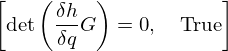

In [12]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.static = algorithms.StaticLinearization.compute(m, h)
m.static.show(m)

**Dynamic linearization**

In [13]:
h = vec(x, y, theta_0, psi_1, psi_2)

m.dynamic = algorithms.DynamicLinearization.compute(m, h)
eqs = m.dynamic.show(m)

display(eqs[0])
display(eqs[1:])

          ⎡  2 ⎛         2                      2                             
          ⎢ R ⋅⎝η₃(t)⋅sin (φ₁(t))⋅sin(θ₀(t))⋅cos (θ₁(t)) + η₃(t)⋅sin(φ₁(t))⋅si
          ⎢ ──────────────────────────────────────────────────────────────────
          ⎢                                                                   
          ⎢                                                                   
          ⎢  2 ⎛         2                      2                             
          ⎢-R ⋅⎝η₃(t)⋅sin (φ₁(t))⋅cos(θ₀(t))⋅cos (θ₁(t)) - η₃(t)⋅sin(φ₁(t))⋅si
          ⎢───────────────────────────────────────────────────────────────────
\ddot h = ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                                                   
          ⎢                                         

⎡    ⎡  η₁(t)  ⎤                                                              
⎢    ⎢         ⎥                                                              
⎢    ⎢  η₂(t)  ⎥                                                              
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                               3   2                          
⎢    ⎢──(η₃(t))⎥                             -R ⋅η₃ (t)⋅η₅(t)⋅sin(φ₂(t))⋅sin(θ
⎢u = ⎢dt       ⎥, \det \left(K_{dd}\right) = ─────────────────────────────────
⎢    ⎢         ⎥                                                          2⋅l 
⎢    ⎢  η₄(t)  ⎥                                                              
⎢    ⎢         ⎥                                                              
⎢    ⎢d        ⎥                                                              
⎢    ⎢──(η₅(t))⎥                                                              
⎣    ⎣dt       ⎦                                    

# Simplified model

With hemispheres replaced by steerable wheels with varying radius.

In [14]:
exec(model.model_simplified_q__exec)

model_simplified = model.define_simplified()
m = model_simplified

assert m.nonholonomic_constrains_satisfied(), 'Nonholonomic constrains not satisfied!'
m.show_pfaff()

⎡sin(θ₀(t) + θᵤ₁(t))  -cos(θ₀(t) + θᵤ₁(t))         0         0     0     0    
⎢                                                                             
⎢cos(θ₀(t) + θᵤ₁(t))  sin(θ₀(t) + θᵤ₁(t))          0         0  -rᵤ₁(t)  0    
⎢                                                                             
⎢sin(θ₀(t) + θᵤ₂(t))  -cos(θ₀(t) + θᵤ₂(t))  2⋅l⋅sin(θᵤ₂(t))  0     0     0    
⎢                                                                             
⎣cos(θ₀(t) + θᵤ₂(t))  sin(θ₀(t) + θᵤ₂(t))   2⋅l⋅cos(θᵤ₂(t))  0     0     0  -r

 0     0  0⎤            
           ⎥            
 0     0  0⎥            
           ⎥⋅\dot{q} = 0
 0     0  0⎥            
           ⎥            
ᵤ₂(t)  0  0⎦            

In [15]:
m.show_as_matrices()
# m.show_as_equations().collect(eta).subs({R/(2*l): Symbol('R^*')})

          ⎡0  rᵤ₁(t)⋅cos(θ₀(t) + θᵤ₁(t))   0  0  0⎤  
          ⎢                                       ⎥  
          ⎢0  rᵤ₁(t)⋅sin(θ₀(t) + θᵤ₁(t))   0  0  0⎥  
          ⎢                                       ⎥  
          ⎢   rᵤ₁(t)⋅sin(θᵤ₁(t) - θᵤ₂(t))         ⎥  
          ⎢0  ───────────────────────────  0  0  0⎥  
          ⎢         2⋅l⋅sin(θᵤ₂(t))               ⎥  
          ⎢                                       ⎥  
          ⎢1               0               0  0  0⎥  
          ⎢                                       ⎥  
\dot{q} = ⎢0               1               0  0  0⎥⋅η
          ⎢                                       ⎥  
          ⎢0               0               1  0  0⎥  
          ⎢                                       ⎥  
          ⎢       rᵤ₁(t)⋅sin(θᵤ₁(t))              ⎥  
          ⎢0      ──────────────────       0  0  0⎥  
          ⎢       rᵤ₂(t)⋅sin(θᵤ₂(t))              ⎥  
          ⎢                                       ⎥  
          ⎢0               0

**Static linearization (requires non-trivial $h(q)$)**

In [16]:
d = Symbol('d')
s, c = sin, cos
h = vec(x + d*c(theta_u1 + theta_0), y + d*s(theta_u1 + theta_0), theta_u2, r_u1, r_u2)

m.static = algorithms.StaticLinearization.compute(m, h)
m.static.show(m)

⎡                                  ⎡  sin(θᵤ₁(t) - θᵤ₂(t))⋅cos(θ₀(t) + θᵤ₁(t))
⎢                                  ⎢- ────────────────────────────────────────
⎢                                  ⎢              2⋅l⋅sin(θᵤ₂(t))             
⎢                                  ⎢                                          
⎢                                  ⎢                      cos(θ₀(t) + θᵤ₁(t)) 
⎢                             -1   ⎢                      ─────────────────── 
⎢(\frac{\delta h}{\delta q}⋅G)   = ⎢                             rᵤ₁(t)       
⎢                                  ⎢                                          
⎢                                  ⎢                               0          
⎢                                  ⎢                                          
⎢                                  ⎢                               0          
⎢                                  ⎢                                          
⎣                                  ⎣                

**Dynamic linearization (controlling radii)**

          ⎡                                    2       2                      
          ⎢                                  η₂ (t)⋅rᵤ₁ (t)⋅sin(θ₀(t) + θᵤ₁(t)
          ⎢η₂(t)⋅η₄(t)⋅cos(θ₀(t) + θᵤ₁(t)) - ─────────────────────────────────
          ⎢                                                      2⋅l⋅sin(θᵤ₂(t
          ⎢                                                                   
          ⎢                                    2       2                      
          ⎢                                  η₂ (t)⋅rᵤ₁ (t)⋅sin(θᵤ₁(t) - θᵤ₂(t
\ddot h = ⎢η₂(t)⋅η₄(t)⋅sin(θ₀(t) + θᵤ₁(t)) + ─────────────────────────────────
          ⎢                                                      2⋅l⋅sin(θᵤ₂(t
          ⎢                                                                   
          ⎢                                            0                      
          ⎢                                                                   
          ⎢                                         

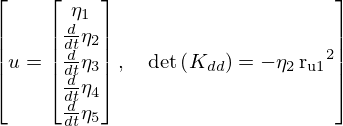

In [17]:
h = vec(x, y, theta_u2, r_u1, r_u2)

m.dynamic_1 = algorithms.DynamicLinearization.compute(m, h)
eqs = m.dynamic_1.show(m)

display(eqs[0])
display(eqs[1:])

**Dynamic linearization (controlling speeds)**

In [18]:
h = vec(x, y, theta_u2, phi_u1, phi_u2)

m.dynamic_2 = algorithms.DynamicLinearization.compute(m, h)
eqs = m.dynamic_2.show(m)

display(eqs[0])
display(eqs[1:])

          ⎡   2       2                                             ⎤         
          ⎢-η₂ (t)⋅rᵤ₁ (t)⋅sin(θ₀(t) + θᵤ₁(t))⋅sin(θᵤ₁(t) - θᵤ₂(t)) ⎥         
          ⎢─────────────────────────────────────────────────────────⎥         
          ⎢                     2⋅l⋅sin(θᵤ₂(t))                     ⎥   ⎡-η₂(t
          ⎢                                                         ⎥   ⎢     
          ⎢   2       2                                             ⎥   ⎢η₂(t)
          ⎢ η₂ (t)⋅rᵤ₁ (t)⋅sin(θᵤ₁(t) - θᵤ₂(t))⋅cos(θ₀(t) + θᵤ₁(t)) ⎥   ⎢     
          ⎢ ─────────────────────────────────────────────────────── ⎥   ⎢     
          ⎢                     2⋅l⋅sin(θᵤ₂(t))                     ⎥   ⎢     
\ddot h = ⎢                                                         ⎥ + ⎢     
          ⎢                            0                            ⎥   ⎢     
          ⎢                                                         ⎥   ⎢    η
          ⎢                            0            

⎡    ⎡  η₁(t)  ⎤                                                         ⎤
⎢    ⎢         ⎥                                                         ⎥
⎢    ⎢d        ⎥                                                         ⎥
⎢    ⎢──(η₂(t))⎥                                                         ⎥
⎢    ⎢dt       ⎥                                3       2                ⎥
⎢    ⎢         ⎥                             -η₂ (t)⋅rᵤ₁ (t)⋅sin(θᵤ₁(t)) ⎥
⎢u = ⎢d        ⎥, \det \left(K_{dd}\right) = ────────────────────────────⎥
⎢    ⎢──(η₃(t))⎥                                    2                    ⎥
⎢    ⎢dt       ⎥                                 rᵤ₂ (t)⋅sin(θᵤ₂(t))     ⎥
⎢    ⎢         ⎥                                                         ⎥
⎢    ⎢  η₄(t)  ⎥                                                         ⎥
⎢    ⎢         ⎥                                                         ⎥
⎣    ⎣  η₅(t)  ⎦                                                         ⎦

---
---

# Save models to a file

In [19]:
mapping = {
    'full_1': model_full_1,
    'full_1_static': model_full_1.static,
    'full_1_dynamic': model_full_1.dynamic,
    'full_2': model_full_2,
    'full_2_static': model_full_2.static,
    'full_2_dynamic': model_full_2.dynamic,
    'full_2_JPTD': model_full_2_JPTD,
    'full_2_JPTD_static': model_full_2_JPTD.static,
    'full_2_JPTD_dynamic': model_full_2_JPTD.dynamic,
    'simplified': model_simplified,
    'simplified_static': model_simplified.static,
    'simplified_dynamic_1': model_simplified.dynamic_1,
    'simplified_dynamic_2': model_simplified.dynamic_2,
}

SympyDumpable.save('generated_models.json', mapping)